#### Carnegie Mellon University - Tepper School of Business
#### 46-881 - Programming in R and Python
#### 22/23 - Mini 2 - Sections MO2 - Farahat
---

## Deliverable 2 
**Due November 16th at 2:59 a.m. Eastern**

Please provide your name and Andrew ID below:

- Name (Last, First): Lerma, Rodolfo

- Andrew ID: rlerma

---

*This deliverable consists of **two** Problems. Both problems require you to code in Python and answer one or more questions. Save a copy of this notebook and provide your solution by inserting code or Markdown text files as appropriate.*

*You will need to submit two files through Canvas: 1) a completed Jupyter notebook (extension .ipynb) with your code and answers to each question (this file); and 2) an html rendering of your completed Jupyter notebook.*

### Problem 1 (60 points)

The SIR model is the original and simplest (in fact, *simplistic*) model of disease spread in epidemiology. It is a *compartmental model* where each individual in a population is classified as being in exactly one of 3 states at any given time: **S**usceptible to infection, **I**nfectious (i.e. infected and capable of infecting susceptible individuals), or **R**ecovered (or "removed"). The model was developed by Kermack and McKendrick in 1927. Many improved predictive models have since been developed for disease spread. In this problem you will use Python to implement and explore this model.

Let S(t), I(t), and R(t) denote, respectively, the number of individuals in a given population who are susceptible, infectious, and recovered on day t. The model utilizes two parameters: Beta and Gamma. For a population of size N, the time-dynamics of the model are as follows:
- S(t+1) = S(t) - Beta * I(t) * S(t) / N
- I(t+1) = I(t) + Beta * I(t) * S(t) / N - Gamma * I(t)
- R(t+1) = R(t) + Gamma * I(t) 

The ratio Beta / Gamma is sometimes referred to as the R0 (R naught) of the disease.

**Note:**

Reference in this [link](https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/)

Develop a Python model of the above SIR model and use it to answer the following questions. Assume a scenario where N = 1000, S(0) = 990, I(0) = 10, Beta = 0.10, and Gamma = 0.05.

In [7]:
#Loading basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Setting the initial variables for the SIR model
N = 1000 #population size
S0 = 990 #The number of individuals in a given population who are susceptible on day t (initial day)
I0 = 10 # The infectious on day t.
R0 = 0 #At the beginning recovered people is zero (N = S + I + R at any given time)
beta = 0.10 
gamma = 0.05
r0 = beta/gamma

In [3]:
# #Functions representing the time development
# St_1 = St - (beta * It * St/N)
# It_1 = It + (beta * It * St/N) - (gamma * It)
# Rt_1 = Rt + (gamma * It)
# print(St_1, It_1, Rt_1)

# St_2 = St_1 - (beta * It_1 * St_1/N)
# It_2 = It_1 + (beta * It_1 * St_1/N) - (gamma * It_1)
# Rt_2 = Rt_1 + (gamma * It_1)
# print(St_2, It_2, Rt_2)

In [4]:
#Empty lists to store the values
S = []
I = []
R = []
time = []

#Initial values
St = S0 #The number of individuals in a given population who are susceptible on day t (initial day)
It = I0 #The infectious on day t.
Rt = R0 #At the beginning recovered people is zero (N = S + I + R at any given time)

for i in range(1,401):
    
    #Model
    St = St - (beta * It * St/N)
    It = It + (beta * It * St/N) - (gamma * It)
    Rt = Rt + (gamma * It)
    
    #Appendig variables
    time.append(i)
    S.append(St)
    I.append(It)
    R.append(Rt)

In [5]:
max_infected = max(I)
print('The Max number of people Infected at the pick of the disease is: ' + str(round(max_infected)))
print('According to the model the pick of the infection is at day: ' + str(pd.Series(I).idxmax() + 1)) #Adding 1 to the index since it starts at Zero

The Max number of people Infected at the pick of the disease is: 155
According to the model the pick of the infection is at day: 89


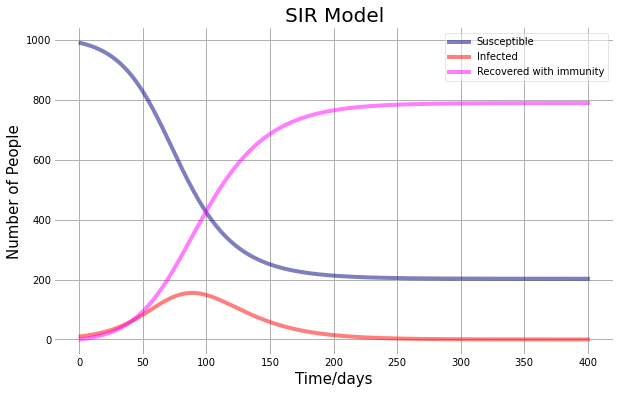

In [34]:
fig = plt.figure(facecolor='w', figsize=(10,6))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(time, S, 'navy', alpha=0.5, lw=4, label='Susceptible')
ax.plot(time, I, 'red', alpha=0.5, lw=4, label='Infected')
ax.plot(time, R, 'magenta', alpha=0.5, lw=4, label='Recovered with immunity')
ax.set_xlabel('Time/days', size = 15)
ax.set_ylabel('Number of People',size = 15)
ax.set_title('SIR Model',size = 20)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', lw=1, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [ ]:
# import numpy as np
# from scipy.integrate import odeint
# import matplotlib.pyplot as plt

# # Total population, N.
# N = 1000
# # Initial number of infected and recovered individuals, I0 and R0.
# I0, R0 = 1, 0
# # Everyone else, S0, is susceptible to infection initially.
# S0 = N - I0 - R0
# # Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
# beta, gamma = 0.2, 1./10 
# # A grid of time points (in days)
# t = np.linspace(0, 160, 160)

# # The SIR model differential equations.
# def deriv(y, t, N, beta, gamma):
#     S, I, R = y
#     dSdt = -beta * S * I / N
#     dIdt = beta * S * I / N - gamma * I
#     dRdt = gamma * I
#     return dSdt, dIdt, dRdt

# # Initial conditions vector
# y0 = S0, I0, R0
# # Integrate the SIR equations over the time grid, t.
# ret = odeint(deriv, y0, t, args=(N, beta, gamma))
# S, I, R = ret.T

# # Plot the data on three separate curves for S(t), I(t) and R(t)
# fig = plt.figure(facecolor='w')
# ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
# ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
# ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
# ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
# ax.set_xlabel('Time /days')
# ax.set_ylabel('Number (1000s)')
# ax.set_ylim(0,1.2)
# ax.yaxis.set_tick_params(length=0)
# ax.xaxis.set_tick_params(length=0)
# ax.grid(b=True, which='major', c='w', lw=2, ls='-')
# legend = ax.legend()
# legend.get_frame().set_alpha(0.5)
# for spine in ('top', 'right', 'bottom', 'left'):
#     ax.spines[spine].set_visible(False)
# plt.show()

#### Part(a)
Suppose our healthcare system has a capacity to accommodate a maximum of 120 infectious persons. Is this capacity sufficient according to the model?

#### Part (b)
Now suppose that our healthcare system can currently accommodate only 120 infectious persons. However, its capacity can be increased to accommodate 180 infectious persons in 2 months. Is this current capacity and expansion plan sufficient according to the model?

----

### Problem 2 (40 points)

Suppose you drive a car whose fuel efficiency is 18 miles per gallon and whose gas tank size is 16 gallons. Gas prices fluctuate according to a **uniform distribution** ranging from 3 dollars per gallon to 5 dollars per gallon. That is, prices remain average equal to 4 dollars per gallon but fluctuate each day according to this uniform distribution. Every day you drive your car for exactly 10 miles.

You are contemplating two gas filling strategies:
- *“Fill-it up” strategy*: You wait till the tank is (almost) empty then fill the entire tank;
- *“30-dollar” strategy*: You wait till the tank is (almost) empty then fill in only 30 dollars worth of gas.

Assume that there are many gas stations around, so you can time your visits almost exactly when the tank is empty. Assume also that any inconvenience from visiting the gas station is negligible. Your only objective is to minimize your gas expenditure.

***Construct a simulation model in Python to determine if one strategy is more economical than the other (and, if so, by how much).*** 

In [ ]:
#Given information
mpg = 18
gas_tank = 16
drive = 10

In [35]:
#Uniform distribution
mean = 4
std = 2/np.sqrt(12) #Since this is a Uniform distribution sigma = (b-a)/sqrt(12)

In [37]:
#Technically a full thank give us:
full_tank_miles = 18*16
print('A full thank can give us ' + str(full_tank_miles) + ' miles')

A full thank can give us 288 miles


In [39]:
days_to_fill = full_tank_miles/10
print('A full thank lasts ' + str(days_to_fill) + ' days')

A full thank lasts 28.8 days


Based on the information provided we know that a full tank based on the expected consumption of `10 miles/day`, give us `28.8 days` of usage. But, for simplicity it is going to be assumed that the price of the gas stays the same during the day, therefore the umber of days will be rounded up to `29 days` for a full tank.

In [102]:
#Gas price distribution over 1000 days
n = 1000 #Number of days
gas_price_distribution = np.random.default_rng(seed=881).uniform(low=3, high=5) 

In [105]:
rng = np.random.default_rng(seed=881)
for i in range(10):
    value = rng.uniform(low=3, high=5) 
    print(value)

3.5382381693240568
4.51675093776503
4.123269542899375
4.1703049384735955
4.874698921120585
4.660140681220221
3.281452214624496
3.271968780731899
3.417574950825178
3.879636653653555


In [103]:
gas_price_distribution

3.5382381693240568

In [100]:
#The first day that we fill up the tank is going to be consider "day 0"
x = []
days = []
for i in range(0,n,29):
    price_x = gas_price_distribution[i] * 16
    x.append(price_x)
    days.append(i)

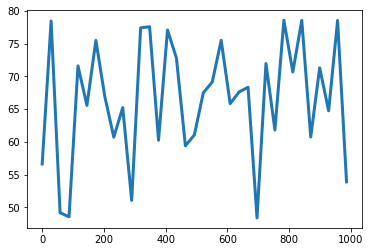

In [101]:
fig, ax = plt.subplots()
ax.plot(days, x, linewidth=3)

In [96]:
#Two Strategies:

#First: Empty and then fill up the tank
# first = []
# for i in gas_price_distribution:
    

#Second: Almost empty and then fill with 30 dollars

----